# Relative Volume (RVOL)

https://chartschool.stockcharts.com/table-of-contents/technical-indicators-and-overlays/technical-indicators/relative-volume-rvol

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)
df.index = pd.Index(df.index.date, name="Date")

# View Columns
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.615887,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.608810,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.797443,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.261944,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.108665,82271200


In [3]:
n = 20  # You can adjust this period as needed

# Calculate the rolling average of the volume
df['Average_Volume'] = df['Volume'].rolling(window=n).mean()

# Calculate the Relative Volume (RVOL)
df['RVOL'] = df['Volume'] / df['Average_Volume']
    

In [4]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Average_Volume,RVOL
Date,,,,,,,,
2018-01-30,41.382500,41.842499,41.174999,41.742500,39.368603,184192800,125440100.0,1.468373
2018-01-31,41.717499,42.110001,41.625000,41.857498,39.477066,129915600,126824700.0,1.024371
2018-02-01,41.792500,42.154999,41.689999,41.945000,39.559586,188923200,130367280.0,1.449161
2018-02-02,41.500000,41.700001,40.025002,40.125000,37.843082,346375200,143199120.0,2.418836
2018-02-05,39.775002,40.970001,39.000000,39.122501,36.897598,290954000,153014820.0,1.901476


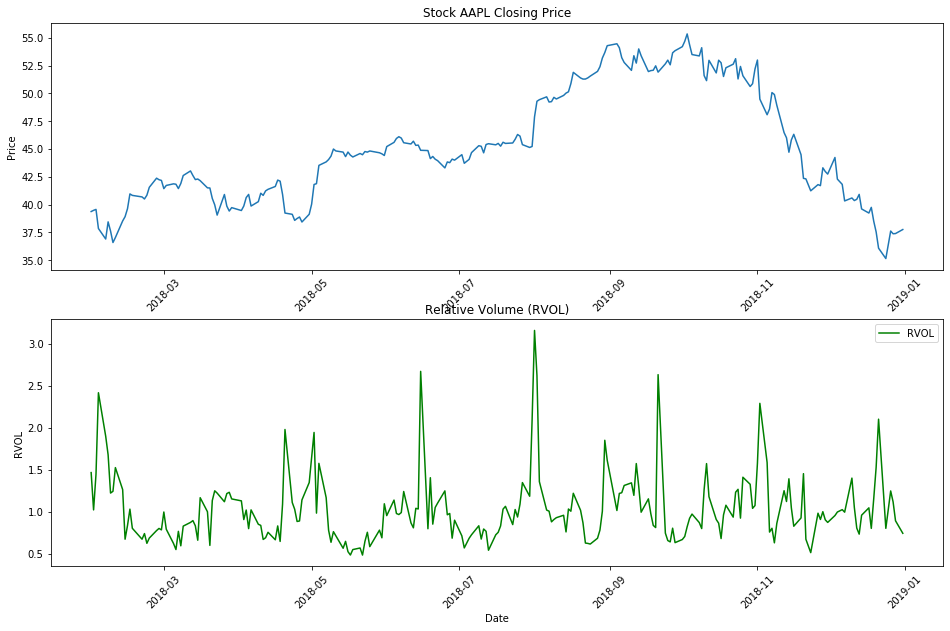

In [5]:
# Create the figure and subplots
fig = plt.figure(figsize=(16, 10))

ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock ' + symbol + ' Closing Price')
ax1.set_ylabel('Price')
ax1.tick_params(axis='x', rotation=45)

# Plot the Relative Volume (RVOL)
ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['RVOL'], label='RVOL', color='green')
ax2.set_title('Relative Volume (RVOL)')
ax2.set_ylabel('RVOL')
ax2.set_xlabel('Date')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(loc='best')

plt.show()

## Candlestick with RVOL

In [8]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Average_Volume,RVOL,VolumePositive
0,736724.0,41.382500,41.842499,41.174999,41.742500,39.368603,184192800,125440100.0,1.468373,False
1,736725.0,41.717499,42.110001,41.625000,41.857498,39.477066,129915600,126824700.0,1.024371,False
2,736726.0,41.792500,42.154999,41.689999,41.945000,39.559586,188923200,130367280.0,1.449161,False
3,736727.0,41.500000,41.700001,40.025002,40.125000,37.843082,346375200,143199120.0,2.418836,False
4,736730.0,39.775002,40.970001,39.000000,39.122501,36.897598,290954000,153014820.0,1.901476,False


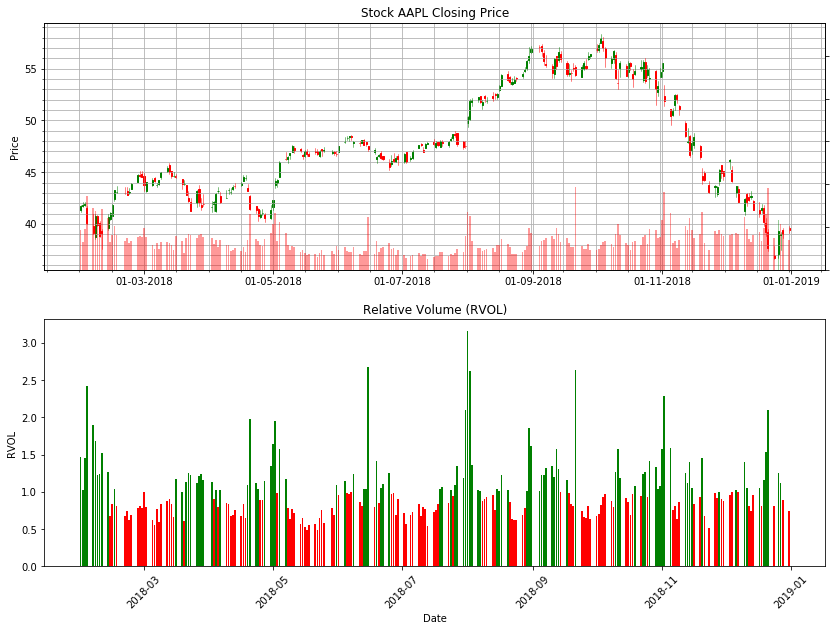

In [9]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

# Plot the Relative Volume (RVOL)
ax2 = plt.subplot(2, 1, 2)

# Color mapping for RVOL: green if positive, red if negative
colors = ['green' if val >= 1 else 'red' for val in df['RVOL']]

ax2.bar(df.index, df['RVOL'], color=colors)
ax2.set_title('Relative Volume (RVOL)')
ax2.set_ylabel('RVOL')
ax2.set_xlabel('Date')
ax2.tick_params(axis='x', rotation=45)

plt.show()